In [36]:
import nltk
import string
import re

import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

In [30]:
train_data = pd.read_csv('http://localhost:8889/edit/train_data.txt', sep=':::', names=['Movie_title', 'Genre', 'Description'], engine='python') 
train_data.describe()
train_data.shape
train_data.info()
train_data.head(10)
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_title  258 non-null    object 
 1   Genre        0 non-null      float64
 2   Description  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


Movie_title      0
Genre          258
Description    258
dtype: int64

                           Movie_title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  
(54214, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_title  54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
                           Movie_title          Genre  \
1        Oscar et la da

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spatr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


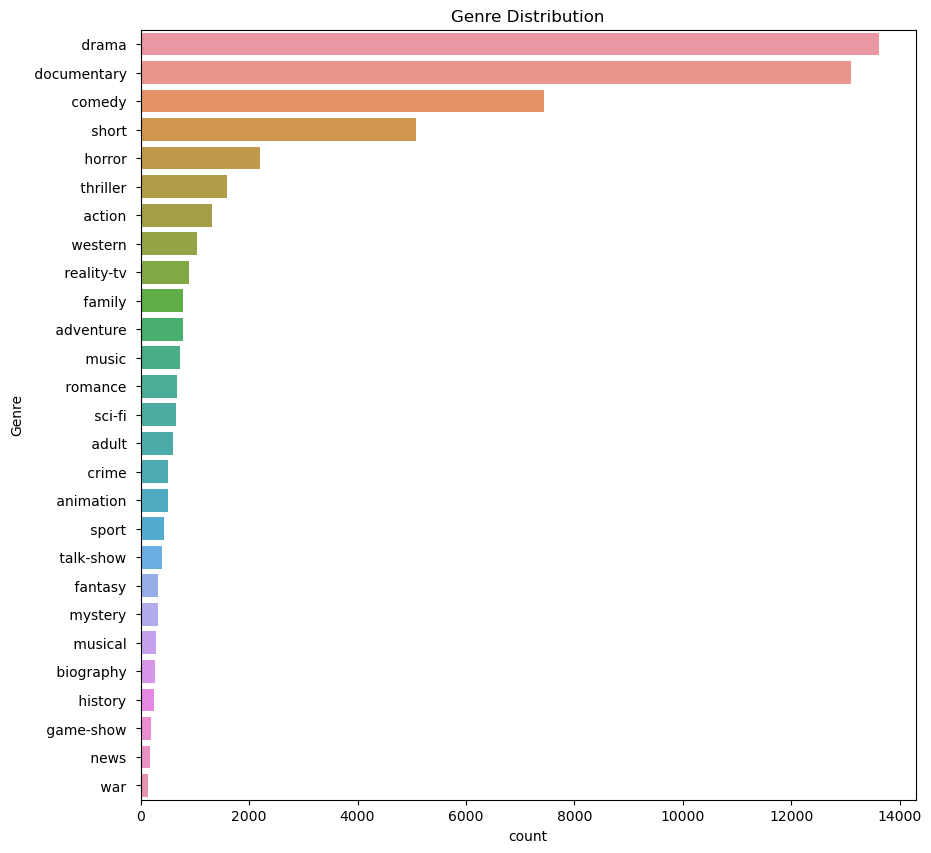

In [20]:
import nltk
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Loading training data (ensure the path and delimiter are correct)
train_data = pd.read_csv("C:\\Users\\spatr\\Downloads\\movie dataset\\Genre Classification Dataset\\train_data.txt", sep=':::', names=['Movie_title', 'Genre', 'Description'], engine='python') 

# Check for null values and structure of the data
print(train_data.describe())
print(train_data.shape)
print(train_data.info())
print(train_data.head(10))
print(train_data.isnull().sum())

# Ensure stopwords are downloaded (run this only if not downloaded yet)
nltk.download('stopwords')

# Loading test data
test_path = "C:\\Users\\spatr\\Downloads\\movie dataset\\Genre Classification Dataset\\test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Movie_title', 'Description'], engine='python')

# Displaying the first few rows of the test data
print(test_data.head())

# Plotting Genre distribution from train_data, as test_data does not have a Genre column
if 'Genre' in train_data.columns:
    plt.figure(figsize=(10,10))
    sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index)
    plt.title("Genre Distribution")
    plt.show()
else:
    print("No 'Genre' column found in train_data.")

# Initializing Lancaster Stemmer and stopwords
stemmer = LancasterStemmer()
stop_words = stopwords.words("english")


In [21]:
import nltk
nltk.download('punkt')
stemmer = LancasterStemmer()
stop_words=stopwords.words("english")

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles and email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text) #tokenize text
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove multiple spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['New_text'] = train_data['Description'].apply(clean_text)
test_data['New_text'] = test_data['Description'].apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spatr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
test_data.head()

,Id,Movie_title,Description,New_text
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [23]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['New_text'])
X_test = tfidf.transform(test_data['New_text'])

In [24]:
# training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
#Model Training And Evaluation
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [26]:
y_pred = nb.predict(X_val) # on validation set

In [28]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4470165083463986


In [31]:
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       248
       adult        0.00      0.00      0.00       110
   adventure        0.00      0.00      0.00       150
   animation        0.00      0.00      0.00       107
   biography        0.00      0.00      0.00        52
      comedy        0.72      0.04      0.08      1497
       crime        0.00      0.00      0.00        90
 documentary        0.53      0.90      0.67      2586
       drama        0.39      0.88      0.54      2773
      family        0.00      0.00      0.00       164
     fantasy        0.00      0.00      0.00        67
   game-show        0.00      0.00      0.00        33
     history        0.00      0.00      0.00        47
      horror        0.00      0.00      0.00       424
       music        0.00      0.00      0.00       163
     musical        0.00      0.00      0.00        56
     mystery        0.00      0.00      0.00        55
        n

C:\Users\spatr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\spatr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\spatr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#Pradiction on Test Data
# Use the trained model to make predictions on the test data
X_test_predictions = nb.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [34]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

          Id                       Movie_title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

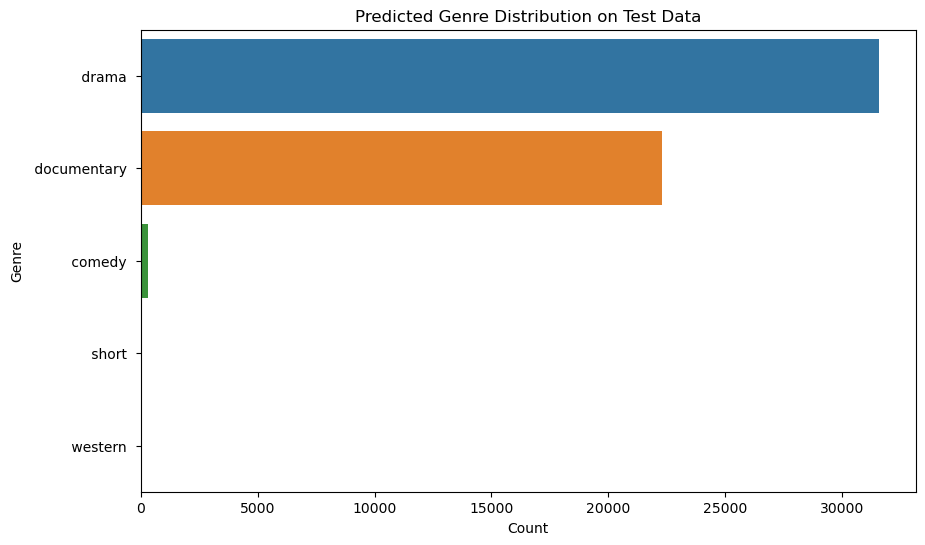

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(y=test_data['Predicted_Genre'], order=test_data['Predicted_Genre'].value_counts().index)
plt.title('Predicted Genre Distribution on Test Data')
plt.ylabel('Genre')
plt.xlabel('Count')
plt.show()


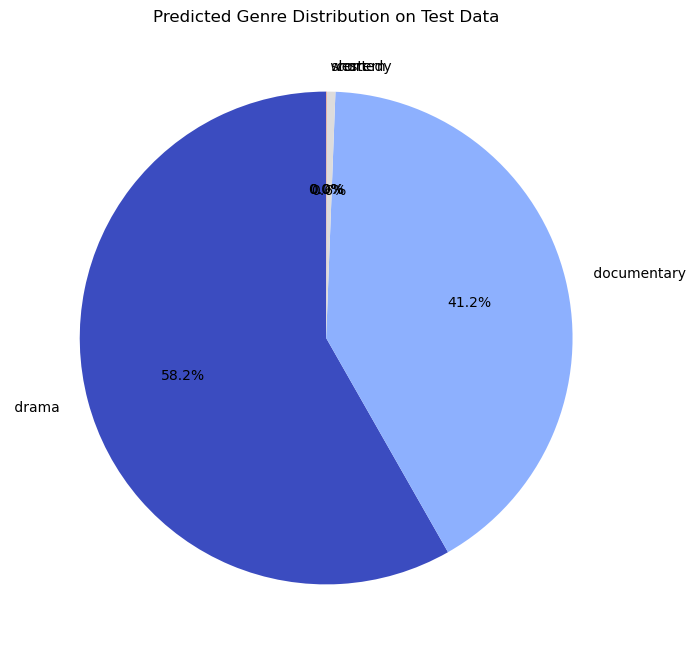

In [42]:
# Plotting a pie chart for predicted genre distribution
plt.figure(figsize=(8, 8))
test_data['Predicted_Genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Predicted Genre Distribution on Test Data')
plt.ylabel('')
plt.show()
